In [11]:
import sys
import os
import re
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib import cm, gridspec, rcParams, colors
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import AxesGrid
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import sys

In [2]:
ds = xr.open_dataset('/lustre/f2/dev/ncep/Jack.Reeveseyre/diurnal_cycle/ocn_2002_01_grid_mld_meanDiurnalCycle.nc')
print(ds)

<xarray.Dataset>
Dimensions:   (time: 1, hour: 24, yt_ocean: 410, xt_ocean: 720)
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.8 -279.2 -278.8 ... 78.75 79.25 79.75
  * yt_ocean  (yt_ocean) float64 -80.75 -80.25 -79.75 ... 88.75 89.25 89.75
    geolon_t  (yt_ocean, xt_ocean) float64 ...
    geolat_t  (yt_ocean, xt_ocean) float64 ...
  * hour      (hour) float64 0.0 1.0 2.0 3.0 4.0 ... 19.0 20.0 21.0 22.0 23.0
  * time      (time) datetime64[ns] 2002-01-01
Data variables:
    mld       (time, hour, yt_ocean, xt_ocean) float64 ...
    hblt      (time, hour, yt_ocean, xt_ocean) float64 ...
Attributes:
    filename:        ocn_2002_01_01_00.nc
    title:           MOM5ICE
    grid_type:       regular
    grid_tile:       N/A
    postprocessing:  monthly mean diurnal cycle


In [8]:
mld_daily_max = ds.mld.isel(time=0).max(dim='hour')
print(mld_daily_max)

<xarray.DataArray 'mld' (yt_ocean: 410, xt_ocean: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.8 -279.2 -278.8 ... 78.75 79.25 79.75
  * yt_ocean  (yt_ocean) float64 -80.75 -80.25 -79.75 ... 88.75 89.25 89.75
    geolon_t  (yt_ocean, xt_ocean) float64 ...
    geolat_t  (yt_ocean, xt_ocean) float64 ...
    time      datetime64[ns] 2002-01-01


In [13]:
def switch_lon_lims(lon_list, min_lon=0.0):
    """Shifts longitudes to be in any chosen arbitrary range.

    Returns a list of longitudes in the interval [min_lon, min_lon+360).
    """
    result = (lon_list - min_lon) % 360.0 + min_lon
    return result

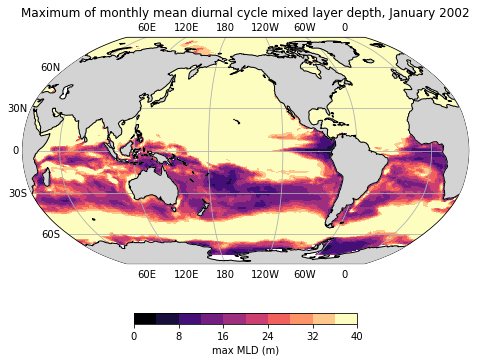

In [15]:
# Set up the figure.
fig = plt.figure(figsize=(8, 6))
data_crs = ccrs.PlateCarree()
plot_crs = ccrs.Robinson(central_longitude=-150)
ax = fig.add_subplot(111, projection=plot_crs)
ax.set_global()
gl = ax.gridlines(draw_labels=True,
                  xlocs=np.arange(-300, 151, 60),
                  ylocs=np.arange(-90, 91, 30),
                  linewidths=0.3)
gl.right_labels = True
gl.xformatter = LongitudeFormatter(zero_direction_label=False,
                                   degree_symbol='')
gl.yformatter = LatitudeFormatter(degree_symbol='')
ax.coastlines(zorder=5)
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=4)
    
# Define color map.
cmap_b = plt.get_cmap('magma')
norm_b = colors.BoundaryNorm(np.arange(0.0, 40.1, 4.0),
                             ncolors=cmap_b.N)

# Plot the data.
p = ax.pcolormesh(switch_lon_lims(mld_daily_max.geolon_t.data, -180.0),
                  mld_daily_max.geolat_t.data,
	        	  mld_daily_max.data,
                  transform=data_crs,
                  cmap=cmap_b, norm=norm_b, shading='nearest')

# Finish up.
ax.set_title('Maximum of monthly mean diurnal cycle mixed layer depth, January 2002')
fig.colorbar(p, label='max MLD (m)',
             ax=ax, orientation='horizontal',shrink=0.5)